In [3]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

In [4]:
#load data
data = pd.read_csv("..\..\Data\Minute\\2010-2014-SANDP-500.txt")

In [5]:
data.head()

,Date,Open,High,Low,Close
0,1262626320,1122.87,1123.80,1122.87,1123.80
1,1262626380,1123.95,1124.18,1123.95,1124.18
2,1262626440,1124.27,1124.27,1124.07,1124.07
3,1262626500,1124.17,1124.26,1124.17,1124.26
4,1262626560,1124.63,1124.63,1124.63,1124.63


In [6]:
#transform data
import datetime
data['Timestamp'] = pd.DataFrame(data.Date)
data.Date = pd.to_datetime(data.Date, unit='s')
data = data.sort_values(by=["Date"])
data.Close = data.Close.astype(float)
data.High = data.High.astype(float)
data.Low = data.Low.astype(float)
data.Open = data.Open.astype(float)

In [9]:
special_data = pd.DataFrame(data)

In [10]:
#change indexes
special_data.set_index('Date', inplace=True)

In [43]:
len(data)

392950

In [47]:
data.to_csv('dataset.csv', index=False)

In [46]:
data.head(20)

,Date,Open,High,Low,Close,Timestamp
0,2010-01-04 17:32:00,1122.87,1123.80,1122.87,1123.80,1262626320
1,2010-01-04 17:33:00,1123.95,1124.18,1123.95,1124.18,1262626380
2,2010-01-04 17:34:00,1124.27,1124.27,1124.07,1124.07,1262626440
3,2010-01-04 17:35:00,1124.17,1124.26,1124.17,1124.26,1262626500
4,2010-01-04 17:36:00,1124.63,1124.63,1124.63,1124.63,1262626560
5,2010-01-04 17:37:00,1126.30,1126.30,1126.18,1126.29,1262626620
6,2010-01-04 17:38:00,1126.50,1126.75,1126.50,1126.75,1262626680
7,2010-01-04 17:39:00,1126.69,1126.74,1126.68,1126.68,1262626740
8,2010-01-04 17:40:00,1126.54,1126.64,1126.54,1126.64,1262626800
9,2010-01-04 17:41:00,1126.92,1126.92,1126.92,1126.92,1262626860


In [12]:
special_data.head(10)

,Open,High,Low,Close,Timestamp
Date,,,,,
2010-01-04 17:32:00,1122.87,1123.80,1122.87,1123.80,1262626320
2010-01-04 17:33:00,1123.95,1124.18,1123.95,1124.18,1262626380
2010-01-04 17:34:00,1124.27,1124.27,1124.07,1124.07,1262626440
2010-01-04 17:35:00,1124.17,1124.26,1124.17,1124.26,1262626500
2010-01-04 17:36:00,1124.63,1124.63,1124.63,1124.63,1262626560
2010-01-04 17:37:00,1126.30,1126.30,1126.18,1126.29,1262626620
2010-01-04 17:38:00,1126.50,1126.75,1126.50,1126.75,1262626680
2010-01-04 17:39:00,1126.69,1126.74,1126.68,1126.68,1262626740
2010-01-04 17:40:00,1126.54,1126.64,1126.54,1126.64,1262626800


In [13]:
special_data['new_index'] = special_data.Close
special_data['new_date'] = special_data.Close
special_data.head()

,Open,High,Low,Close,Timestamp,new_index,new_date
Date,,,,,,,
2010-01-04 17:32:00,1122.87,1123.80,1122.87,1123.80,1262626320,1123.80,1123.80
2010-01-04 17:33:00,1123.95,1124.18,1123.95,1124.18,1262626380,1124.18,1124.18
2010-01-04 17:34:00,1124.27,1124.27,1124.07,1124.07,1262626440,1124.07,1124.07
2010-01-04 17:35:00,1124.17,1124.26,1124.17,1124.26,1262626500,1124.26,1124.26
2010-01-04 17:36:00,1124.63,1124.63,1124.63,1124.63,1262626560,1124.63,1124.63


In [14]:
#change indexes
special_data.set_index('new_date', inplace=True)

In [15]:
special_data.head(20)

,Open,High,Low,Close,Timestamp,new_index
new_date,,,,,,
1123.80,1122.87,1123.80,1122.87,1123.80,1262626320,1123.80
1124.18,1123.95,1124.18,1123.95,1124.18,1262626380,1124.18
1124.07,1124.27,1124.27,1124.07,1124.07,1262626440,1124.07
1124.26,1124.17,1124.26,1124.17,1124.26,1262626500,1124.26
1124.63,1124.63,1124.63,1124.63,1124.63,1262626560,1124.63
1126.29,1126.30,1126.30,1126.18,1126.29,1262626620,1126.29
1126.75,1126.50,1126.75,1126.50,1126.75,1262626680,1126.75
1126.68,1126.69,1126.74,1126.68,1126.68,1262626740,1126.68
1126.64,1126.54,1126.64,1126.54,1126.64,1262626800,1126.64


In [39]:
data.tail()

,Date,Open,High,Low,Close,Timestamp
392945,2014-01-01 01:01:00,1847.43,1848.35,1847.43,1848.35,1388538060
392946,2014-01-01 01:02:00,1848.35,1848.36,1848.35,1848.36,1388538120
392947,2014-01-01 01:03:00,1848.35,1848.36,1848.35,1848.36,1388538180
392948,2014-01-01 02:16:00,1848.36,1848.36,1848.36,1848.36,1388542560
392949,2014-01-01 09:01:00,1848.36,1848.36,1848.36,1848.36,1388566860


In [16]:
print(special_data.index.inferred_freq)

AttributeError: 'Float64Index' object has no attribute 'inferred_freq'

In [17]:
special_data.set_index('new_index', inplace = True)

In [18]:
special_data.head(20)

,Open,High,Low,Close,Timestamp
new_index,,,,,
1123.80,1122.87,1123.80,1122.87,1123.80,1262626320
1124.18,1123.95,1124.18,1123.95,1124.18,1262626380
1124.07,1124.27,1124.27,1124.07,1124.07,1262626440
1124.26,1124.17,1124.26,1124.17,1124.26,1262626500
1124.63,1124.63,1124.63,1124.63,1124.63,1262626560
1126.29,1126.30,1126.30,1126.18,1126.29,1262626620
1126.75,1126.50,1126.75,1126.50,1126.75,1262626680
1126.68,1126.69,1126.74,1126.68,1126.68,1262626740
1126.64,1126.54,1126.64,1126.54,1126.64,1262626800


In [40]:
# Разделяем данные на обучающую и тестовую выборки
n = int(len(data) * 0.2)
train_data = data.iloc[:-n]  # используйте нужное количество точек для обучения
test_data = data.iloc[-n:]   # используйте оставшиеся точки для тестирования

In [41]:
train_data

,Date,Open,High,Low,Close,Timestamp
0,2010-01-04 17:32:00,1122.87,1123.80,1122.87,1123.80,1262626320
1,2010-01-04 17:33:00,1123.95,1124.18,1123.95,1124.18,1262626380
2,2010-01-04 17:34:00,1124.27,1124.27,1124.07,1124.07,1262626440
3,2010-01-04 17:35:00,1124.17,1124.26,1124.17,1124.26,1262626500
4,2010-01-04 17:36:00,1124.63,1124.63,1124.63,1124.63,1262626560
...,...,...,...,...,...,...
314355,2013-03-19 22:00:00,1542.09,1542.16,1542.06,1542.06,1363730400
314356,2013-03-19 22:01:00,1542.05,1542.23,1541.96,1542.23,1363730460
314357,2013-03-19 22:02:00,1542.31,1542.47,1542.31,1542.47,1363730520
314358,2013-03-19 22:03:00,1542.48,1542.67,1542.48,1542.67,1363730580


In [42]:
train_data = train_data.drop(['High', 'Open', 'Low', 'Timestamp'], axis = 1)
test_data = test_data.drop(['High', 'Open', 'Low', 'Timestamp'], axis = 1)

In [29]:
train_data

,Date,Close
0,2010-01-04 17:32:00,1123.80
1,2010-01-04 17:33:00,1124.18
2,2010-01-04 17:34:00,1124.07
3,2010-01-04 17:35:00,1124.26
4,2010-01-04 17:36:00,1124.63
...,...,...
78585,2010-10-27 23:30:00,1178.73
78586,2010-10-27 23:31:00,1179.34
78587,2010-10-27 23:32:00,1179.15
78588,2010-10-27 23:33:00,1179.10


In [31]:
train_data.set_index('Date', inplace=True)

In [34]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(train_data, model='additive', period = 7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

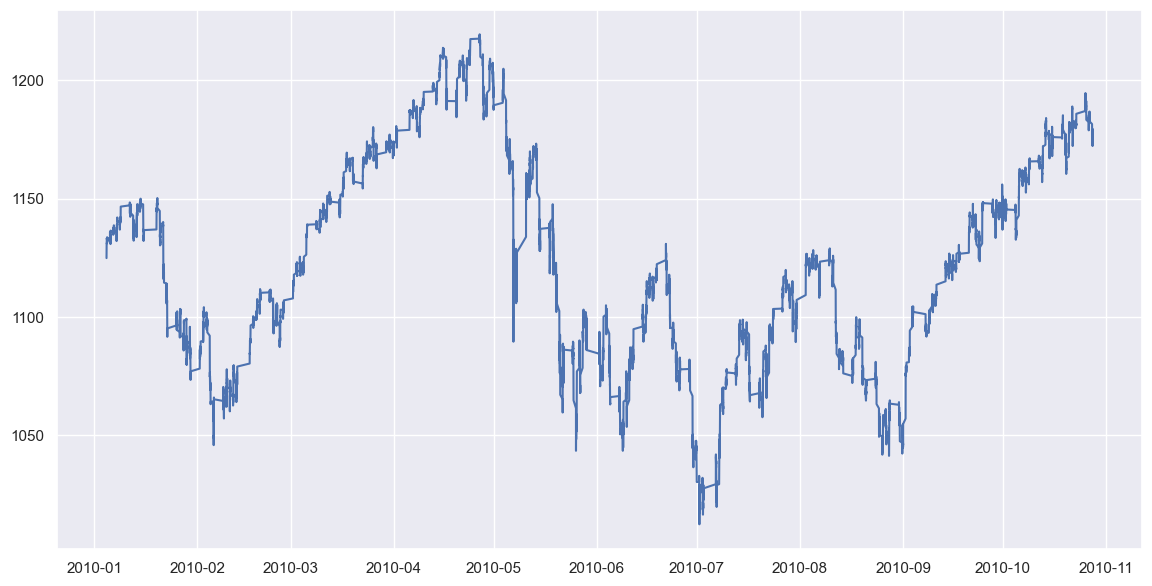

In [35]:
plt.plot(trend)

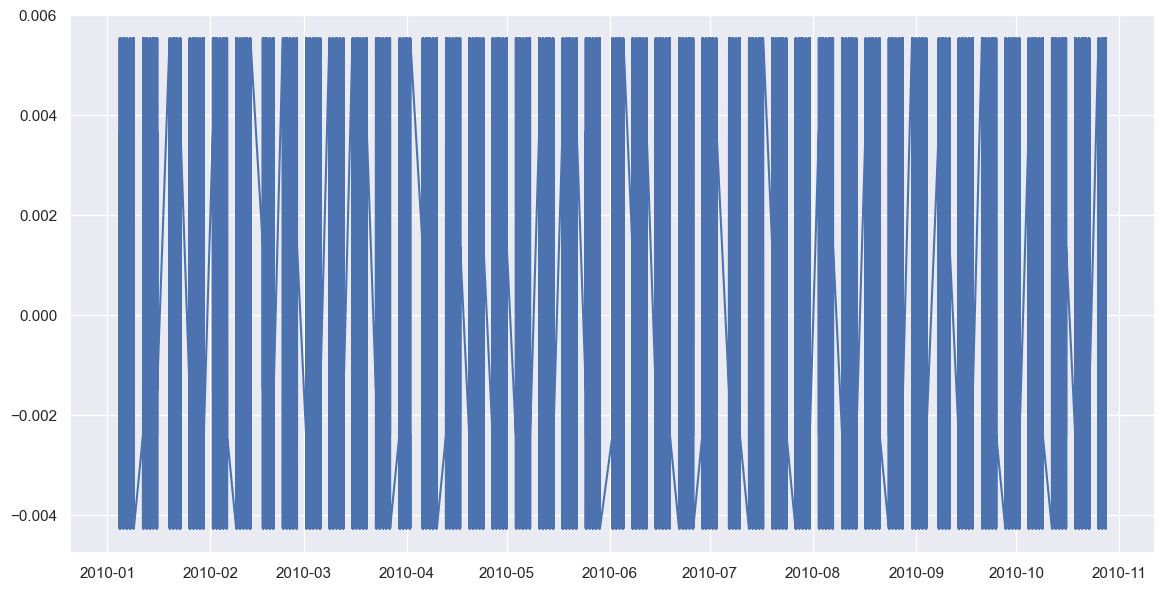

In [36]:
plt.plot(seasonal)

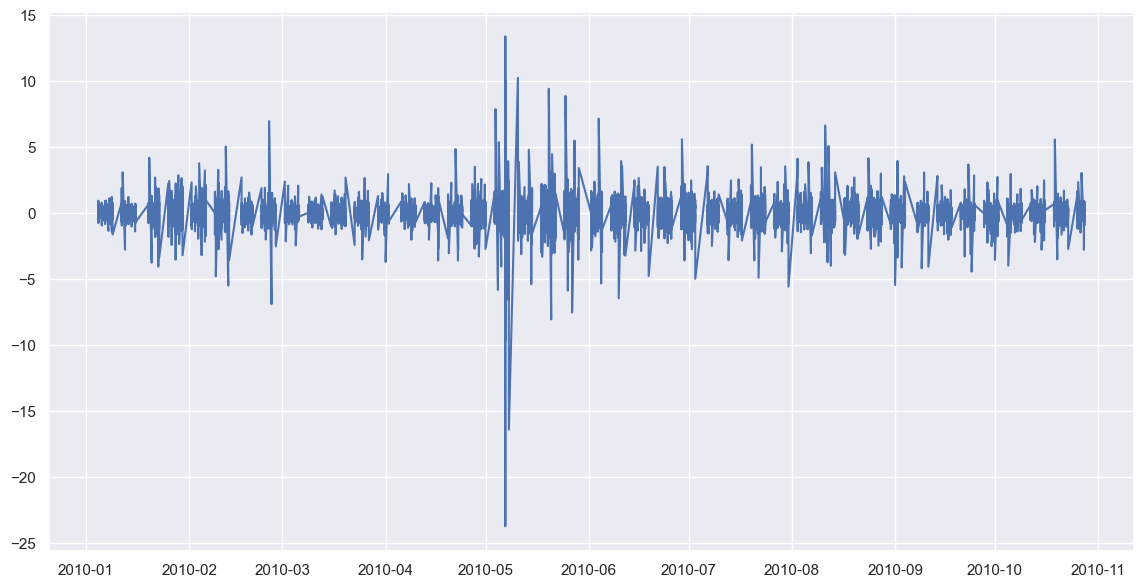

In [37]:
plt.plot(residual)


In [ ]:
from statsmodels.tsa.ar_model import AutoReg
# Создайте и обучите модель AR
model = AutoReg(train_data, lags=lags)
model_fit = model.fit()